Feature extraction bằng ORB

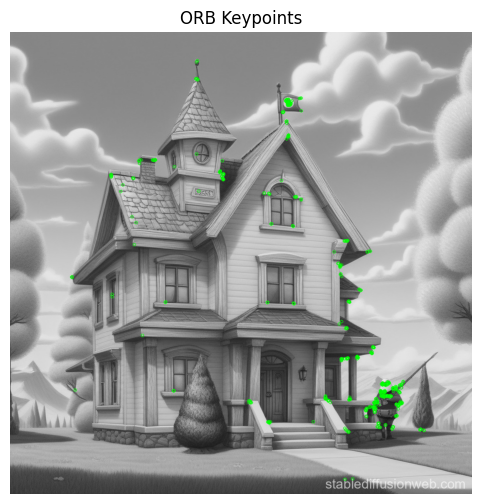

Number of Keypoints: 500
Shape of Descriptors: (500, 32)


In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('pic9.jpg', cv2.IMREAD_GRAYSCALE)

# ORB (Oriented FAST and Rotated BRIEF) là một thuật toán phát hiện đặc trưng. Hàm này khởi tạo một đối tượng ORB, giúp bạn phát hiện và mô tả các đặc trưng (features) trên ảnh.
orb = cv2.ORB_create()

# Detect keypoints and descriptors
# Phát hiện keypoints: Các keypoints là các điểm nổi bật trong ảnh (như góc hoặc cạnh), có thể được sử dụng để nhận diện hoặc so sánh ảnh.
# Tính toán descriptors: Descriptors là các vector đặc trưng miêu tả nội dung cục bộ xung quanh từng keypoint, dùng để so sánh giữa các keypoints trong những bức ảnh khác nhau.
# None: Đây là mặt nạ (mask) cho ảnh, nếu bạn muốn chỉ xử lý một phần của ảnh. Trong trường hợp này không có mặt nạ nào được sử dụng, nên truyền vào None.
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw the keypoints on the image
# None: Đầu ra là ảnh mới có keypoints, nên truyền None ở đây.
keypoints_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

plt.figure(figsize=(10, 6))
plt.imshow(keypoints_image, cmap='gray')
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()

# Display some information about the keypoints
print(f"Number of Keypoints: {len(keypoints)}")
print(f"Shape of Descriptors: {descriptors.shape}")

SIFT (Scale-Invariant Feature Transform)

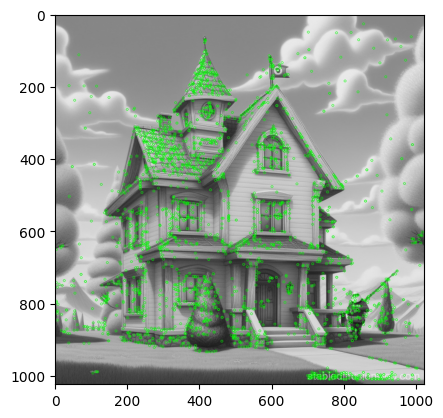

In [6]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('pic9.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(image, None)

keypoints_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

plt.imshow(keypoints_image, cmap='gray')
plt.show()

Harris Corner Detection

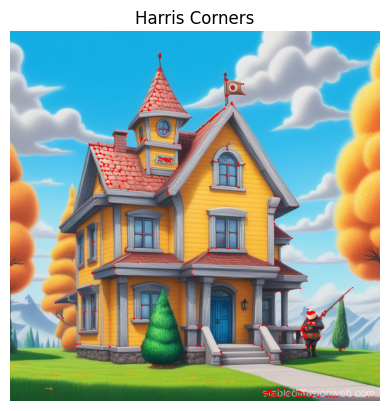

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('pic9.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect Harris corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate the corner points for better visibility
dst = cv2.dilate(dst, None)

# Threshold to mark the corners in red
image[dst > 0.01 * dst.max()] = [0, 0, 255]

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the result using matplotlib
plt.imshow(image_rgb)
plt.title('Harris Corners')
plt.axis('off')  # Hide axis
plt.show()

Panorama stitching

Stitching successful!


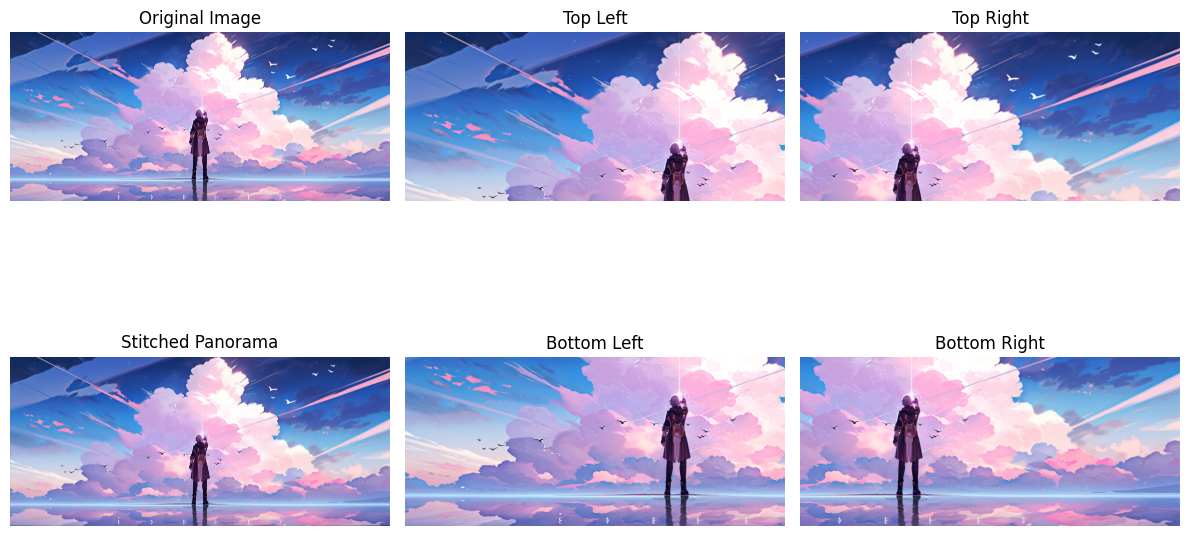

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic10.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, _ = image.shape

# Define overlap percentages
vertical_overlap_percentage = 0.2  # 20% overlap for top and bottom
horizontal_overlap_percentage = 0.2  # 20% overlap for left and right

# Calculate overlap in pixels
overlap_height = int(height * vertical_overlap_percentage)
overlap_width = int(width * horizontal_overlap_percentage)

# Calculate coordinates for cropping with overlap
half_height = height // 2
half_width = width // 2

# Crop the image into four parts with overlap
top_left = image[0:half_height + overlap_height, 0:half_width + overlap_width]
top_right = image[0:half_height + overlap_height, half_width - overlap_width:width]
bottom_left = image[half_height - overlap_height:height, 0:half_width + overlap_width]
bottom_right = image[half_height - overlap_height:height, half_width - overlap_width:width]

# Convert cropped images to RGB for display
top_left_rgb = cv2.cvtColor(top_left, cv2.COLOR_BGR2RGB)
top_right_rgb = cv2.cvtColor(top_right, cv2.COLOR_BGR2RGB)
bottom_left_rgb = cv2.cvtColor(bottom_left, cv2.COLOR_BGR2RGB)
bottom_right_rgb = cv2.cvtColor(bottom_right, cv2.COLOR_BGR2RGB)

# Save the cropped images
cv2.imwrite('pic10a.jpg', top_left)
cv2.imwrite('pic10b.jpg', top_right)
cv2.imwrite('pic10c.jpg', bottom_left)
cv2.imwrite('pic10d.jpg', bottom_right)

# Load the cropped images for stitching
image1 = cv2.imread('pic10a.jpg')
image2 = cv2.imread('pic10b.jpg')
image3 = cv2.imread('pic10c.jpg')
image4 = cv2.imread('pic10d.jpg')

# Combine them into a list for stitching
images = [image1, image2, image3, image4]

# Create a Stitcher instance
stitcher = cv2.Stitcher_create()

# Stitch the images
(status, stitched_image) = stitcher.stitch(images)

# Check if stitching was successful
if status == cv2.Stitcher_OK:
    print("Stitching successful!")
    # Convert the stitched image to RGB for display
    stitched_image_rgb = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB)
else:
    print("Stitching failed: error code", status)
    stitched_image_rgb = np.zeros_like(image_rgb)  # Create a black image as placeholder

# Plot the original and stitched images
plt.figure(figsize=(12, 8))

# Plot original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot cropped images
plt.subplot(2, 3, 2)
plt.imshow(top_left_rgb)
plt.title('Top Left')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(top_right_rgb)
plt.title('Top Right')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(bottom_left_rgb)
plt.title('Bottom Left')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(bottom_right_rgb)
plt.title('Bottom Right')
plt.axis('off')

# Plot stitched panorama
plt.subplot(2, 3, 4)
plt.imshow(stitched_image_rgb)
plt.title('Stitched Panorama')
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()
